Importing Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.combine import SMOTEENN

Exploratory Data Analysis

Load the dataset & reading the dataset

In [2]:
df=pd.read_csv("TelcoCustomer_Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Check the dimensions of the dataset

In [3]:
df.shape

(7043, 21)

Check for missing values

In [4]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Check for duplicates

In [5]:
print(df.duplicated().sum())

0


Check the data types of the columns

In [6]:
print(df.dtypes)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


Visualize the distribution of the target variable

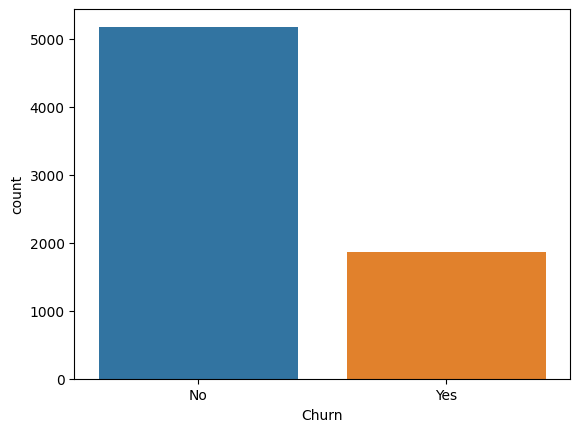

In [7]:
sns.countplot(x='Churn', data=df)
plt.show()

Visualize the correlation between the features

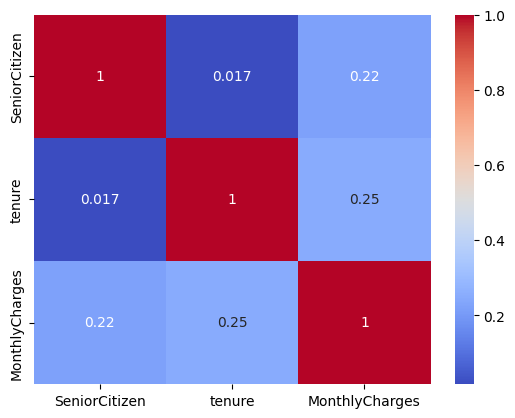

In [8]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

Convert the 'TotalCharges' column of the DataFrame df to numeric values using the pd.to_numeric()

In [9]:
df.replace('', pd.np.nan, inplace=True)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


Imputing for missing values in a dataset using the median value of the column.

In [10]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
df['TotalCharges'] = imputer.fit_transform(df[['TotalCharges']])

Convert categorical columns to numeric using label encoding

In [11]:
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['Partner'] = le.fit_transform(df['Partner'])
df['Dependents'] = le.fit_transform(df['Dependents'])
df['PhoneService'] = le.fit_transform(df['PhoneService'])
df['MultipleLines'] = le.fit_transform(df['MultipleLines'])
df['InternetService'] = le.fit_transform(df['InternetService'])
df['OnlineSecurity'] = le.fit_transform(df['OnlineSecurity'])
df['OnlineBackup'] = le.fit_transform(df['OnlineBackup'])
df['DeviceProtection'] = le.fit_transform(df['DeviceProtection'])
df['TechSupport'] = le.fit_transform(df['TechSupport'])
df['StreamingTV'] = le.fit_transform(df['StreamingTV'])
df['StreamingMovies'] = le.fit_transform(df['StreamingMovies'])
df['Contract'] = le.fit_transform(df['Contract'])
df['PaperlessBilling'] = le.fit_transform(df['PaperlessBilling'])
df['PaymentMethod'] = le.fit_transform(df['PaymentMethod'])
df['Churn'] = le.fit_transform(df['Churn'])

Select the features to use for prediction

In [12]:
features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 
            'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
            'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']

Create a new DataFrame with only the selected features

In [26]:
X = df[features]
X


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60


Create a binary target variable indicating whether each customer churned

In [14]:
y = df['Churn']
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int32

Model Selection

Initialize the models

In [15]:
lr_model = LogisticRegression()
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()

Split the dataset into training and testing sets

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Model Training and Evaluation

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

Train and evaluate the logistic regression model

In [18]:
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
print('Logistic Regression:')
print(classification_report(y_test, y_pred))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.58      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409



For imbalanced dataset, use SMOTEENN resampling technique

In [19]:
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(X,y)
xr_train,xr_test,yr_train,yr_test=train_test_split(X_resampled, y_resampled,test_size=0.2)
model_dt_smote=LogisticRegression()
model_dt_smote.fit(xr_train,yr_train)
yr_predict = model_dt_smote.predict(xr_test)
model_score_r = model_dt_smote.score(xr_test, yr_test)
print(model_score_r)
print(metrics.classification_report(yr_test, yr_predict))


0.9161016949152543
              precision    recall  f1-score   support

           0       0.91      0.90      0.90       513
           1       0.92      0.93      0.93       667

    accuracy                           0.92      1180
   macro avg       0.92      0.91      0.91      1180
weighted avg       0.92      0.92      0.92      1180



Train and evaluate the Decision Tree model

In [20]:
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)
print('Decision Tree:')
print(classification_report(y_test, y_pred))

Decision Tree:
              precision    recall  f1-score   support

           0       0.82      0.81      0.81      1036
           1       0.49      0.50      0.49       373

    accuracy                           0.73      1409
   macro avg       0.65      0.66      0.65      1409
weighted avg       0.73      0.73      0.73      1409



For imbalanced dataset, use SMOTEENN resampling technique

In [21]:
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(X,y)
xr_train,xr_test,yr_train,yr_test=train_test_split(X_resampled, y_resampled,test_size=0.2)
model_dt_smote=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)
model_dt_smote.fit(xr_train,yr_train)
yr_predict = model_dt_smote.predict(xr_test)
model_score_r = model_dt_smote.score(xr_test, yr_test)
print(model_score_r)
print(metrics.classification_report(yr_test, yr_predict))





0.9266211604095563
              precision    recall  f1-score   support

           0       0.93      0.90      0.92       520
           1       0.92      0.94      0.93       652

    accuracy                           0.93      1172
   macro avg       0.93      0.92      0.93      1172
weighted avg       0.93      0.93      0.93      1172



Train and evaluate the Random Forest model

In [22]:
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print('Random Forest:')
print(classification_report(y_test, y_pred))

Random Forest:
              precision    recall  f1-score   support

           0       0.82      0.91      0.87      1036
           1       0.66      0.46      0.54       373

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.70      1409
weighted avg       0.78      0.79      0.78      1409



For imbalanced dataset, use SMOTEENN resampling technique

In [23]:
sm = SMOTEENN()
X_resampled1, y_resampled1 = sm.fit_resample(X,y)
xr_train1,xr_test1,yr_train1,yr_test1=train_test_split(X_resampled1, y_resampled1,test_size=0.2)
model_rf_smote=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)
model_rf_smote.fit(xr_train1,yr_train1)
RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)
yr_predict1 = model_rf_smote.predict(xr_test1)
model_score_r1 = model_rf_smote.score(xr_test1, yr_test1)
print(model_score_r1)
print(metrics.classification_report(yr_test1, yr_predict1))

0.9271186440677966
              precision    recall  f1-score   support

           0       0.95      0.90      0.92       568
           1       0.91      0.95      0.93       612

    accuracy                           0.93      1180
   macro avg       0.93      0.93      0.93      1180
weighted avg       0.93      0.93      0.93      1180



AUC score on the holdout dataset 

In [24]:
from sklearn.metrics import roc_auc_score
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split


X_holdout, X_test, y_holdout, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

# Check the shape of the holdout data
print("Holdout data shape:", X_holdout.shape, y_holdout.shape)


# Make predictions on the holdout dataset
y_pred_holdout = model_rf_smote.predict(X_holdout)

# Calculate the AUC score
auc_score_holdout = roc_auc_score(y_holdout, y_pred_holdout)

print("AUC score on holdout dataset:", auc_score_holdout)




Holdout data shape: (704, 19) (704,)
AUC score on holdout dataset: 0.7928660826032541


Pickling Model

In [25]:
from sklearn.feature_extraction import DictVectorizer
import pickle

dv = DictVectorizer(sparse=False)
with open('model_rf_smote.bin', 'wb') as f_out:
    pickle.dump((model_rf_smote, dv), f_out)